# DATA WRANGLING 

GOAL : wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

`THE DATA WE HAVE`
- Enhanced Twitter Archive
- Additional Data via the Twitter API
- Image Predictions File

Steps
- Data wrangling, which consists of:
   - Gathering data
   - Assessing data
   - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load twitter-archive-enhanced.csv into a DataFrame
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

# Create dataframe from TSV
df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')

In [4]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
selected_attr = []
with open('tweet_json.txt', mode = 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
        
        
tweet_select = pd.DataFrame(selected_attr, columns =['tweet_id','favorites','retweets','timestamp'])

In [6]:
tweet_select

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,111,41,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,311,147,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,128,47,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,132,48,Sun Nov 15 23:05:30 +0000 2015


# Assess

following problem
- Quality Issues
- Tidiness Issues

**CHECK ARCHIVE**:
-  Completeness:
   1. missing data in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
   2. tweet_id is an int 
- Validity:
    1. dog names: some dogs have 'None' as a name, or 'a', or 'an.'
    2. Dataset have duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
- Accuracy:
    1. timestamp is an object
    2. retweeted_status_timestamp is also an object 
    3. rating_numerator goes up to 1776 
- Consistency:
    1. rating_denominator should be a standard 10, but there are a multitude of other values
    2. the source column still has the HTML tags

In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter['retweeted_status_id'].duplicated().sum() #find duplicate

2174

In [9]:
twitter['name'].value_counts() #count  name have problem 

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Gunner       1
Gerbald      1
Kendall      1
Bruno        1
Rizzo        1
Name: name, Length: 957, dtype: int64

**Check Image Dataframe Analysis**
- Validity:
  1. p1, p2 and p3 columns have invalid data
- Consistency:
  1. p1, p2 and p3 columns aren't consistent when it comes to capitalization: sometimes the dog breed listed is all lowercase, sometimes it is written in Sentence Case.
  2. in p1, p2 and p3 columns there is an underscore for multi-word dog breeds


In [10]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
from IPython.display import Image 
Image(url ='https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg')
# picture from id 666057090499244032

In [12]:
df_image_predictions['tweet_id'].duplicated().sum()

0

In [13]:
df_image_predictions['p1'].value_counts()  # count different column

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
harp                    1
peacock                 1
coil                    1
shield                  1
carton                  1
Name: p1, Length: 378, dtype: int64

**Check Twitter Counts Dataframe Analysis**
- Completeness:
   1. missing some data

In [14]:
tweet_select = tweet_select.drop('timestamp' , axis=1) #drop timestamp not use 

In [15]:
tweet_select.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [16]:
tweet_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
tweet_select.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [18]:
tweet_select['tweet_id'].duplicated().sum()

0

# Clean

**Process**:
- Define
- Code
- Test

In [19]:
twitter_clean = twitter.copy()
df_image_predictions = df_image_predictions.copy()
tweet_select_clean = tweet_select.copy() 

In [20]:
#1. Code  merge function
from functools import reduce
dfc = [twitter_clean, df_image_predictions, tweet_select_clean]
twitter_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfc)

In [21]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [22]:
twitter_dogs.info() #test function

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [23]:
#2. code new dog_type column
twitter_dogs['dog_type'] = twitter_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [24]:
twitter_dogs['dog_type'].value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_type, dtype: int64

In [25]:
# testing new dog_type column
twitter_dogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
1043,pupper,None,None,pupper,None
744,NaN,None,None,None,None
209,NaN,None,None,None,None
782,pupper,None,None,pupper,None
1104,NaN,None,None,None,None
1423,pupper,None,None,pupper,None
1511,NaN,None,None,None,None
1099,NaN,None,None,None,None
1185,NaN,None,None,None,None
2051,NaN,None,None,None,None


In [26]:
twitter_dogs[twitter_dogs.tweet_id == 858843525470990336]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_type
143,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,...,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,16304,3771,puppo


In [27]:
# 3. code Remove retweet status
twitter_dogs = twitter_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [28]:
#test Remove retweet
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [29]:
# 4. code Drop column not use
twitter_dogs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

In [30]:
# test 
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   text                2073 non-null   object 
 3   expanded_urls       2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   doggo               2073 non-null   object 
 8   floofer             2073 non-null   object 
 9   pupper              2073 non-null   object 
 10  puppo               2073 non-null   object 
 11  jpg_url             2073 non-null   object 
 12  p1                  2073 non-null   object 
 13  p1_conf             2073 non-null   float64
 14  p1_dog              2073 non-null   bool   
 15  p2                  2073 non-null   object 
 16  p2_con

In [31]:
# 5.Change tweet_id  integer to string 
twitter_dogs['tweet_id'] = twitter_dogs['tweet_id'].astype(str)

In [32]:
# test 
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   object 
 1   timestamp           2073 non-null   object 
 2   text                2073 non-null   object 
 3   expanded_urls       2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   doggo               2073 non-null   object 
 8   floofer             2073 non-null   object 
 9   pupper              2073 non-null   object 
 10  puppo               2073 non-null   object 
 11  jpg_url             2073 non-null   object 
 12  p1                  2073 non-null   object 
 13  p1_conf             2073 non-null   float64
 14  p1_dog              2073 non-null   bool   
 15  p2                  2073 non-null   object 
 16  p2_con

In [33]:
# 6. code remove time zone
twitter_dogs['timestamp'] = twitter_dogs['timestamp'].str.slice(start=0, stop=-6)

In [34]:
#6. change timestamp to datetime
twitter_dogs['timestamp'] = pd.to_datetime(twitter_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [35]:
#6. test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   object        
 1   timestamp           2073 non-null   datetime64[ns]
 2   text                2073 non-null   object        
 3   expanded_urls       2073 non-null   object        
 4   rating_numerator    2073 non-null   int64         
 5   rating_denominator  2073 non-null   int64         
 6   name                2073 non-null   object        
 7   doggo               2073 non-null   object        
 8   floofer             2073 non-null   object        
 9   pupper              2073 non-null   object        
 10  puppo               2073 non-null   object        
 11  jpg_url             2073 non-null   object        
 12  p1                  2073 non-null   object        
 13  p1_conf             2073 non-null   float64     

In [36]:
#7. Code replace name error by 'None'
twitter_dogs.name = twitter_dogs.name.str.replace('^[a-z]+', 'None')

In [37]:
#test 
twitter_dogs['name'].value_counts()

None       677
Charlie     11
Cooper      10
Oliver      10
Penny       10
          ... 
Brockly      1
Grizzie      1
Donny        1
Rueben       1
Rizzo        1
Name: name, Length: 914, dtype: int64

In [38]:
twitter_dogs['name'].sample(10)

466        Chef
76         None
1012       Siba
394       Atlas
1022       None
1633     Bailey
792      Stewie
660     Winston
1704     Gustaf
200     Pickles
Name: name, dtype: object

In [39]:
# 8. Code change type rating 
twitter_dogs['rating_numerator'] = twitter_dogs['rating_numerator'].astype(float)

In [40]:
# 8. Code change type rating 
twitter_dogs['rating_denominator'] = twitter_dogs['rating_denominator'].astype(float)

In [41]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   object        
 1   timestamp           2073 non-null   datetime64[ns]
 2   text                2073 non-null   object        
 3   expanded_urls       2073 non-null   object        
 4   rating_numerator    2073 non-null   float64       
 5   rating_denominator  2073 non-null   float64       
 6   name                2073 non-null   object        
 7   doggo               2073 non-null   object        
 8   floofer             2073 non-null   object        
 9   pupper              2073 non-null   object        
 10  puppo               2073 non-null   object        
 11  jpg_url             2073 non-null   object        
 12  p1                  2073 non-null   object        
 13  p1_conf             2073 non-null   float64     

In [42]:
# Code  loop to gather all text, indices, and ratings for tweets 
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text


['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [43]:
# 8 - Code (cont)

# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[40, 558, 614, 1451]

In [44]:
# 8 - Code (cont)
#Correctly converting the above decimal ratings to float
twitter_dogs.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_dogs.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_dogs.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_dogs.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [45]:
twitter_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [46]:
# 8 - Test (cont)
# Testing the indices - Bella used to be 5/10, but now is correctly converted to 13.5/10 - she gets the rating she deserves!
twitter_dogs.loc[40]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
p1                                                     golden_retriever
p1_conf                                                        0

In [47]:
from IPython.display import Image 
Image(url = ' https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg')

In [48]:
# 8 calulate the value with new, standardized ratings
twitter_dogs['rating'] = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']

In [49]:
twitter_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN,1.2


In [50]:
#test rating  correct
twitter_dogs.loc[50]

tweet_id                                             881536004380872706
timestamp                                           2017-07-02 15:32:16
text                  Here is a pupper approaching maximum borkdrive...
expanded_urls         https://twitter.com/dog_rates/status/881536004...
rating_numerator                                                     14
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                           pupper
puppo                                                              None
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/88153...
p1                                                              Samoyed
p1_conf                                                        0

In [51]:
twitter_dogs['rating'].describe()

count    2073.000000
mean        1.165780
std         3.986165
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [52]:
# 9 - Code image prediction
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_dogs.apply(prediction_func, axis=1)
twitter_dogs['prediction'] = predictions
twitter_dogs['confidence_level'] = confidence_level


# Delete columns
twitter_dogs = twitter_dogs.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


In [53]:
#9. test code
twitter_dogs['prediction'].value_counts()

NaN                   323
golden_retriever      173
Labrador_retriever    113
Chihuahua              95
Pembroke               95
                     ... 
clumber                 1
Irish_wolfhound         1
standard_schnauzer      1
EntleBucher             1
silky_terrier           1
Name: prediction, Length: 114, dtype: int64

# Reporting and  Visualizing Data

1. Report and Visual total number of tweets increases, or decreases.
2. Visual the retweet counts and  comparison over time.
3. Visual most popular dog breed.
4. Visual most popular dog names.

In [54]:
# Storing the new twitter_dogs df to a new csv file
twitter_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# 1 Analyze and Visualize the total number of tweets over time to see whether that number increases, or decreases, over time

In [55]:
twitter_dogs.timestamp = pd.to_datetime(twitter_dogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_dogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2073
dtype: int64

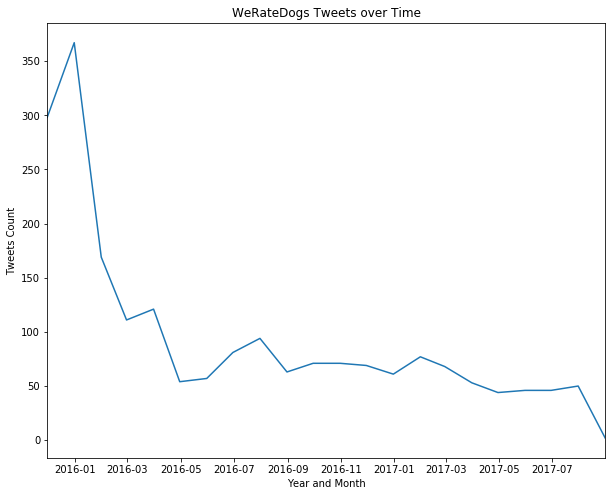

In [56]:
import datetime

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 31)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

Over time tweets decrease after summer 2016.

# 2 Analyze and Visualize: retweet counts, and favorite counts comparison over time.

C:\Users\Chalee\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


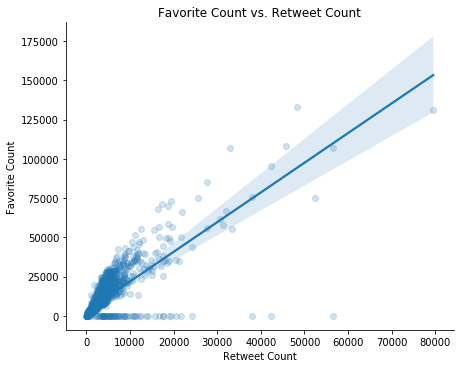

In [57]:
#Find relation retweet counts and favorite count

sns.lmplot(x="retweets", 
           y="favorites", 
           data=twitter_dogs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

Favorite counts are correlated with retweet counts. It is a positive correlation.

# 3  Analyze and Visualize: the most popular dog breed

In [58]:
twitter_dogs['dog_type'].value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_type, dtype: int64

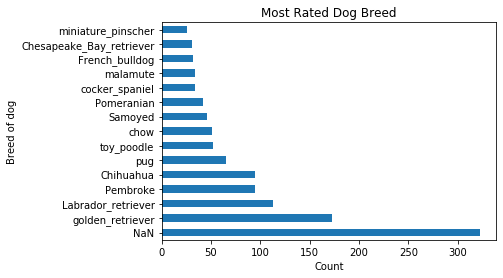

In [59]:
# Show Histogram to visualize dog breeeds
prediction = twitter_dogs.groupby('prediction').filter(lambda x: len(x) >= 25)

prediction['prediction'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

# Sources
- https://knowledge.udacity.com/questions/68700
- https://docs.python.org/3/library/datetime.html
- https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top
